<a href="https://colab.research.google.com/github/yvsim001/KI-Projekt/blob/main/beispielNetz_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


NameError: name 'keras' is not defined

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 48s 105ms/step - loss: 0.3840 - accuracy: 0.8827 - val_loss: 0.0844 - val_accuracy: 0.9762
Epoch 2/15
422/422 [==============================] - 39s 92ms/step - loss: 0.1124 - accuracy: 0.9656 - val_loss: 0.0554 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0860 - accuracy: 0.9737 - val_loss: 0.0485 - val_accuracy: 0.9857
Epoch 4/15
422/422 [==============================] - 39s 94ms/step - loss: 0.0710 - accuracy: 0.9783 - val_loss: 0.0459 - val_accuracy: 0.9863
Epoch 5/15
422/422 [==============================] - 38s 91ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0385 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 39s 91ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 37s 87ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0332 - val_accuracy

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.029932668432593346
Test accuracy: 0.989799976348877


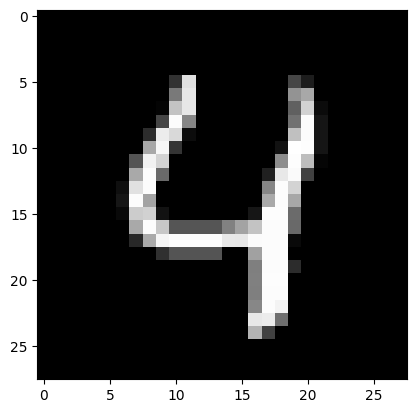

1/1 [==============================] - 0s 20ms/step
Predictions (in percentages) for each class:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 99.99%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.01%


In [ ]:
import matplotlib.pyplot as plt
test_images = x_test
# For example, if test_images[4] is a single image with shape (28, 28, 1)
img = test_images[4]

# Display the image
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# Reshape the image to match the model's input requirements (1, 28, 28, 1)
img_reshaped = np.expand_dims(img, axis=0)

# Predict using the reshaped image
prediction = model.predict(img_reshaped)

# Print the prediction
print("Predictions (in percentages) for each class:")
for idx, prob in enumerate(prediction[0]):
    print(f"Class {idx}: {prob*100:.2f}%")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


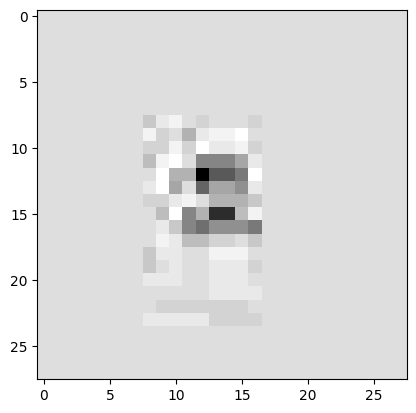

1/1 [==============================] - 0s 32ms/step
Predictions (in percentages) for each class:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 100.00%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the image from the specified path and resize it to 28x28
img_path = "/content/drive/MyDrive/RANDOM_IMAGE_FOR_TEST/Nummer_2.jpg"
img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))

# Convert the image to an array
img_array = img_to_array(img)


# Display the resized image
plt.imshow(img_array.squeeze(), cmap='gray')
plt.show()

# Reshape the image to match the model's input requirements (1, 28, 28, 1)
img_reshaped = np.expand_dims(img_array, axis=0)

# Predict using the reshaped image
prediction = model.predict(img_reshaped)

# Print the prediction
print("Predictions (in percentages) for each class:")
for idx, prob in enumerate(prediction[0]):
    print(f"Class {idx}: {prob*100:.2f}%")
